In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from pylab import rcParams
rcParams['figure.figsize'] = 12, 9

# Статистика для физиков

Основными задачами экспериментаторов являются измерения различного рода величин и иногда открытие новых феноменов. При этом всегда возникает необходимость оценить правильность результата, и как он согласуется с теорией.

Пример из [статьи](http://inspirehep.net/record/1410174/files/ATLAS-CONF-2015-081.pdf?version=1)

<img style="max-width: 300px" src="ris1.png">

Какова вероятность, что выброс порожден обычным фоновым процессом, а не тем процессом, что нам интересен (новой физикой)?

## Вероятность

Что такое вероятность? На данный вопрос довольно сложно дать однозначный ответ. Выделяют несколько трактовок этого понятия:

* частотный подход (Frequentist) - процентная доля интересуемых событий 
<br/><br/>
$$
p = \lim_{N \to \infty} \frac{n}{N}
$$

* субъективный (Bayesian) - степень уверенности в чем-то
> Он станет президентом с вероятностью 60%

## Законы теории вероятности

Несмотря на разные трактовки, законые теории вероятности одни и те же. Стоит отметить, что язык, которым пользуются физики значительно отличается от языка, которым пользуются статистики.

> __Событие__ - физики под этим обычно подразумевают результат эксперимента, у которого может быть несколько исходов. Как пример, бросок кости или столкновение двух протонов в коллайдере. Статистики под событием обычно подразумевают подмножество в простанстве всех возможных значений (сумма двух кубов больше 5 или $p_T(\gamma) > 40 GeV$).

Пусть __A__ и __B__ некоторые события. Тогда будем обозначать 
* $A \cup B$ или $A + B$ как наступление события либо $A$, либо $B$, либо $A$ и $B$ одновременно
* $A \cap B$ или $AB$ как наступление, одновременно, событий $A$ и $B$ 

Для любых двух событий $A$ и $B$ верно

$$
P(A + B) = P(A) + P(B) - P(AB)
$$

<img src="./AB.png"/>

И если события __несовместны (взаимно исключают друг друга)__, то есть при наступлении события $A$, событие $B$ произойти не может

$$
P(A + B) = P(A) + P(B)
$$

## Условная вероятность

Пусть

$$
P(A) = \frac{n_A}{N}\quad P(AB) = \frac{n_{AB}}{N} \\
P(AB) = \frac{n_A}{N}\frac{n_{AB}}{n_A} = P(A) \frac{n_{AB}}{n_A}
$$

> __Условная вероятность__ - это вероятность события __B__, при условии, что событие **A** уже произошло 
<br/><br/>
$$
P(B|A) = \frac{P(AB)}{P(A)}
$$

Отсюда можно получить сразу же следствие. Если на появления события __B__ не влияет появление события **A**, то данные события считаются независимыми

$$
P(B|A) = P(B) \\
P(AB) = P(A) P(B)
$$

## Формула полной вероятности

Если считать, что множество событий $\{A_i\}_{i=1}^N$ несовместны

$$
P(B) = \sum_i P(A_i B) = \sum_i P(A_i) P(B|A_i)
$$

данный процесс можно назвать маргинализацией (Marginalisation) и он является довольно частым явление в физике. Нередко нас может интересовать только наступление события $P(B)$, но мерим или работаем мы с условной вероятностью. Данной операцией мы можем избавиться от ненужных параметров и получить то, что нам нужно.

## Теорема Байеса

Если подумать, то мы можем записать $P(AB)$ двумя способами

$$
P(AB) = P(A) P(B|A) = P(B) P(A|B)
$$

что приводит нас к

$$
P(A|B) = \frac{P(B|A) P(A)}{P(B)}
$$

* __P(A)__ - априорная вероятность гипотезы или события A
* __P(B)__ - полная вероятность события B
* __P(A|B)__ - вероятность гипотезы A при наступлении события B (апостериорная вероятность)
* __P(B|A)__ - вероятность наступления события B при истинности гипотезы A (правдоподобие)

Например, пусть у нас есть детектор, который умеет регистрировать мюоны с вероятностью $P(+|\mu) = 0.95$, то есть 5% мюонов будут им пропущены. Небольшая доля пионов регистрируется как мюон с вероятностью $P(+|\pi) = 0.05$. Нам нужно посчитать вероятность того, что зарегистрированная частица - это мюон.

Для этого нам нужно знать долю пионов и мюонов в поток частиц. Пусть это будет $P(\mu) = 0.04$ и $P(\pi) = 0.96$.

Теперь по формуле
$$
P(\mu|+) = \frac{P(+|\mu) P(\mu)}{P(+)}
\\
P(+) = P(+|\mu) P(\mu) + P(+|\pi) P(\pi)
$$

In [2]:
0.95 * 0.04 / (0.95 * 0.04 + 0.05 * 0.96)

0.4418604651162791

## Случайные величины

Пока мы говорили об абстрактной вероятности. Рассмотрим же её теперь подробнее.

> __Случайная величина__ - это просто переменная, которая представляется собой численные исходы какого-либо события.

Случайные величины бывают:
* дискретными
* непрерывными

## Дискретные случайные величины

Если существет лишь конечное число исходов некого события __A__, то каждому конкретному исходу $A_i$ можно приписать вероятность

$$
P(A = A_i) = P_i
$$

Множество вероятностей $P_i$ называют дискретным распределением вероятности.

И достаточно очевидно, что

$$
\sum_i P(A = A_i) = 1
$$

Это означает, что вероятность наступления любого события равна 1, что довольно логично.


Хорошим примером является бросок кубика или вероятность конкретного процесса при столкновении двух протонов в коллайдере.

## Непрерывные случайные величины

Если случайная величина может принимать любые значения из некоторого непрерывного интервала значений, то такую величину принято называть непрерывной.

Примером может служить длина комнаты, температура за окном, импульс частицы и т.д.


Здесь у нас возникают небольшие проблемы, ведь если
$$
P(X = x) \not = 0
$$

тогда сумма по всем $x$ даст нам
$$
\sum_x P(X = x) = \infty 
$$

что не будет иметь смысла.


Обойдем эту проблему следующим образом. Вместо конкретного значения $x$ мы расммотрим вероятность того, что $X$ находится в каком-то малом интервале

$$
P(x < X < x + dx) = f(x)dx
$$

где $f(x)$ будем называть функцией плотности вероятности (probability density function). __Физики нередко называют это распределением вероятности.__

Отсюда 
$$
P(x_1 < X < x_2) = \int_{x_1}^{x_2} f(x) dx = F(x_2) - F(x_1)
$$

где $F(x)$ - это функция вероятности (Cumulative distribution function)
$$
F(x) = \int_{-\infty}^x f(x) dx
$$

При этом всегда имеет место
$$
\int_{-\infty}^\infty f(x) dx = 1
$$


## Основные характеристики распределений

* Математическое ожидание или среднее (expected value or mean), которое принято обозначать $\mu$
<br><br>
$$
\begin{align}
&\mu = \langle X \rangle = E[X] = \sum_x x P(X = x), \,\,\,\,\,\,\, &\text{дискретный случай} 
\\
&\mu = \langle X \rangle = E[X] = \int_{-\infty}^\infty x f(x)\, dx \,\,\,\,\,\,\, &\text{непрерывный случай} 
\end{align}
$$

* Математическое ожидание или среднее (mean) от некоторой функции случайно величины $h(X)$
<br><br>
$$
\begin{align}
&E[f(X)] = \sum_x h(x) P(X = x), \,\,\,\,\,\,\, &\text{дискретный случай} 
\\
&E[f(X)] = \int_{-\infty}^\infty h(x) f(x), dx \,\,\,\,\,\,\, &\text{непрерывный случай} 
\end{align}
$$

* Дисперсия (variance) или среднеквадратичная ошибка (mean square error) которую принято обозначать $\sigma^2$
<br><br>
$$
\sigma^2 = D[x] = Var[x] = E[ (x-\mu)^2 ] = E[x^2] - (E[x])^2
$$

> $E[x^2]$ - называют средним квадратическим (root mean square), а $\sigma$ - стандартным отклонение (standard deviation)

* Ковариация
<br><br>
$$
Cov(X, Y) = E[ (X - E[X])(Y - E[Y]) ]
$$
* Коэффициент корреляции
* Медиана
* Коэффициент ассиметрии
* и другие


## Нормальное распределение

Одно из самых выжнейших классов распределений
$$
f(x|\mu, \sigma^2) = \mathcal{N}(x|\mu, \sigma^2) = \frac{1}{ \sqrt{2\pi \sigma^2}} e^{-\frac{(x-\mu)^2}{2\sigma^2}}
$$

* $\mu = \mu$
* $\sigma^2 = \sigma^2$

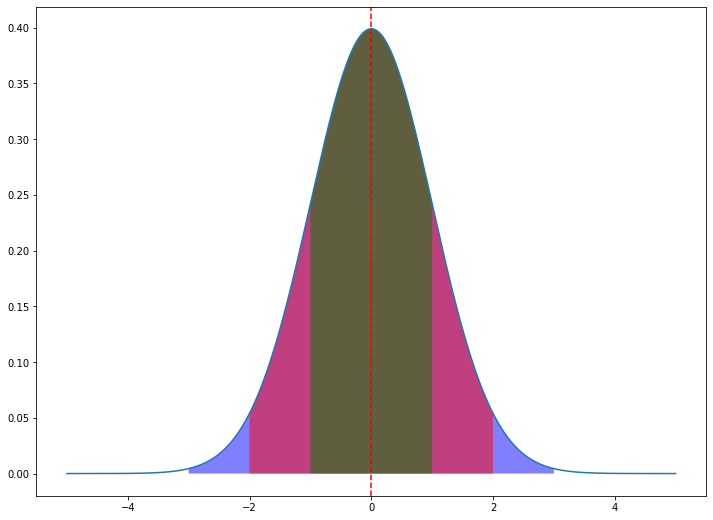

In [124]:
from scipy.stats import norm

x = np.linspace(-5, 5, 1000)

xs = np.linspace(-3, 3, 100)
plt.fill(np.concatenate([xs, xs[::-1]]),
         np.concatenate([norm.pdf(xs), np.zeros(xs.shape)]),
         alpha=.5, fc='b')

xs = np.linspace(-2, 2, 100)
plt.fill(np.concatenate([xs, xs[::-1]]),
         np.concatenate([norm.pdf(xs), np.zeros(xs.shape)]),
         alpha=.5, fc='r')

xs = np.linspace(-1, 1, 100)
plt.fill(np.concatenate([xs, xs[::-1]]),
         np.concatenate([norm.pdf(xs), np.zeros(xs.shape)]),
         alpha=.5, fc='g')
plt.axvline(0, c='r', ls='--')
plt.plot(x, norm.pdf(x));

Оно на столько канонично, что иногда вероятности выражают через квантили данного распределения на так называемой Z-шкале.

> Квантиль - это некое число $x_\alpha$, значение которого случайная величина не превышает с некоторой наперед заданной вероятностью $\alpha$
<br><br>
$$
P(X \le x_\alpha) = \alpha
\\
F(x_\alpha) = \alpha
$$


Квантили нормального распределения обычно смотрять в виде
$$
P(x - k_\alpha \sigma < \mu < x + k_\alpha \sigma] = \alpha
$$

| $k_\alpha$ | $\alpha$<img width=100/>                |
| ---------- | ----------------------- |
| 1          | 68.3%                   |
| 2          | 95.4%                   |
| 3          | 99.7%                   |
| 4          | $1 - 6.5 \cdot 10^{-3}$ % |
| 5          | $1 - 5.7 \cdot 10^{-5}$ % |

Для удобства вероятности различного рода величин иногда также записывают в количествах $\sigma$ нормального распределения. При этом сами эти величины могут быть из любого распределения. 

$$
k_\alpha = \sqrt{2} \, \mathrm{erf}^{-1} (\alpha)
$$

Иногда называют это $Z$-масштаб ($Z$ scale).

In [26]:
from scipy.special import erfinv

np.sqrt(2) * erfinv(0.683), np.sqrt(2) * erfinv(0.954), np.sqrt(2) * erfinv(0.999)

(1.0006418287624492, 1.9953933101678245, 3.2905267314919255)

## Центральная предельная теорема

Если не очень строго, то

> Пусть __X__ - случайная величина, распределенная по любому закону с конечными средним и дисперсией. Тогда сумма достаточно большого числа этих случайных величин
<br>
$$
S = \sum_{i=1}^{N} X_i
$$
будет вести себя как случайная величина, распределенная по закону $\mathcal{N}(n\mu, n\sigma^2)$

Таким образом, биномиального распределение как сумма случайных событий Бернулли при больших $N$ стремится к нормальному распределению, это же касается распределения Пуассона при больших $\lambda$.

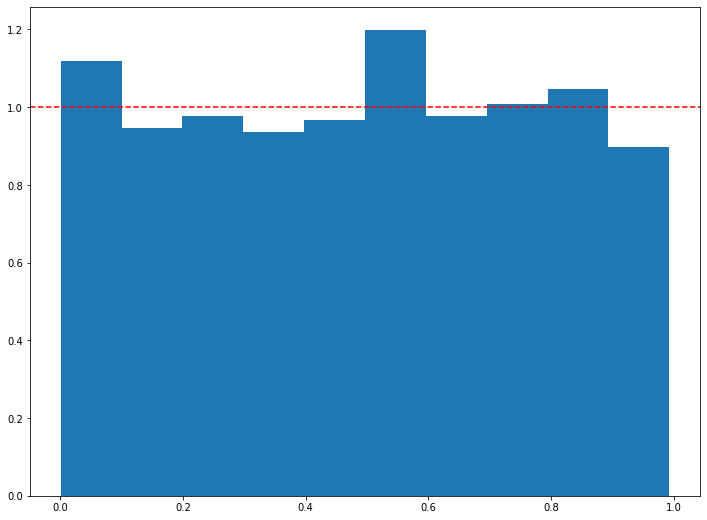

In [8]:
from scipy.stats import uniform

# Проверим работу этой теоремы на
# равномерное распределение

# сначала проверим, что оно равномерно
rvs = uniform.rvs(size=1000)
plt.axhline(1, c='r', ls='--',)
plt.hist(rvs, density=True, bins=10)
plt.show()

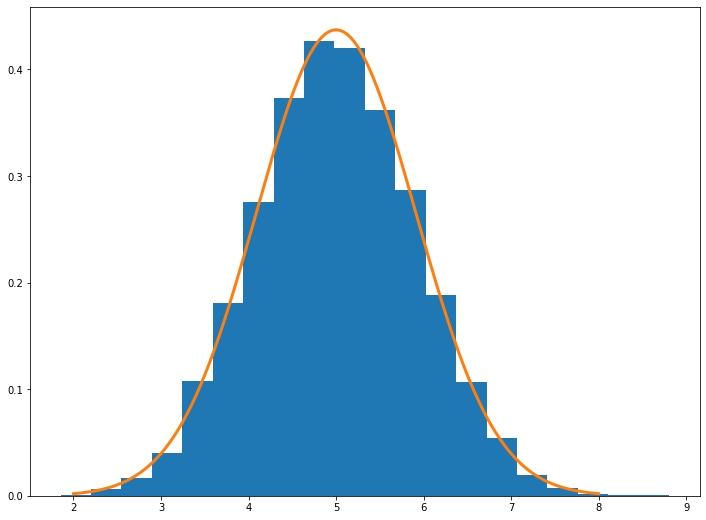

In [5]:
from scipy.stats import norm

# Теперь найдем сумму K равномерно распределенных
# случайных величин

K = 10
rvs = [uniform.rvs(size=K).sum() for _ in range(10000)]
plt.hist(rvs, density=True, bins=20);

# И сравним с нормальным распределением из теоремы
x = np.linspace(2, 8, 1000)
plt.plot(x, norm.pdf(x, K/2, np.sqrt(K/12)), lw=3)
plt.show()